# Contexto de la Base de Datos


Este es un conjunto de datos transnacionales que contiene todas las transacciones que ocurrieron entre el 12/01/2010 y el 12/09/2011 para una tienda minorista en línea registrada y con sede en el Reino Unido. La empresa vende principalmente regalos únicos para toda ocasión. Muchos clientes de la empresa son mayoristas".

In [107]:
import pandas as pd #libreria de lectura de doc, matemática etc...
import numpy as np #Librería de algebra, y clave del data Science
import seaborn as sns # Una de las muchas  librerias para gráficos(con la que tengo familiaridad)
import scipy.stats as stats #Liberia de estadística
import pycountry # Es una libreria que permite acceder a los códigos de paises establecidos por la Norma ISO 3166
from matplotlib import pyplot as plt
import plotly.express as px
import random
import calendar
#Se agregarán más en cuanto avance el temario de clase

In [45]:
df = pd.read_csv("C:\\Users\\javie\\Downloads\\Estadistica\\ComercioElectronico\\data.csv", encoding= 'unicode_escape') 
df.head()


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [46]:
#limites del dataset son [0,541909]

tam_muestra = 54190
data = df.sample(n=tam_muestra, random_state=42) #es una muestra aleatoria de 54190 registros
comercio = data.dropna()
comercio.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 40201 entries, 209268 to 253969
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    40201 non-null  object 
 1   StockCode    40201 non-null  object 
 2   Description  40201 non-null  object 
 3   Quantity     40201 non-null  float64
 4   InvoiceDate  40201 non-null  object 
 5   UnitPrice    40201 non-null  float64
 6   CustomerID   40201 non-null  float64
 7   Country      40201 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.8+ MB


In [47]:
comercio.nunique()

InvoiceNo      13548
StockCode       2958
Description     3050
Quantity         171
InvoiceDate    12896
UnitPrice        247
CustomerID      3815
Country           37
dtype: int64

# Medidas de Localización

In [48]:
comercio.describe()

Quantity     UnitPrice    CustomerID
count  40201.000000  40201.000000  40201.000000
mean      13.602000      3.313681  15280.177458
std      372.318354     27.446294   1715.833779
min    -1350.000000      0.000000  12346.000000
25%        2.000000      1.250000  13949.000000
50%        5.000000      1.950000  15122.000000
75%       12.000000      3.750000  16791.000000
max    74215.000000   4161.060000  18287.000000

In [49]:
comercio.describe(exclude = np.number)

InvoiceNo StockCode                         Description  \
count      40201     40201                               40201   
unique     13548      2958                                3050   
top       580727    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq          58       200                                 200   

            InvoiceDate         Country  
count             40201           40201  
unique            12896              37  
top     12/5/2011 17:17  United Kingdom  
freq                 59           35707

In [79]:
comercio['Quantity'].max()

74215.0

Es un dato muy grande, pero puede ser válido ya que el enunciado nos dice que algunas de sus ventas son realizadas a mayoristas.

Se eliminan los registros que tenian cantidad menor a cero

In [56]:
pedidos = comercio[comercio['Quantity'] >= 0]

conteo_pedidos_por_pais = pedidos['Country'].value_counts()

print(conteo_pedidos_por_pais)



United Kingdom          34942
Germany                   930
France                    827
EIRE                      731
Spain                     253
Netherlands               232
Belgium                   187
Portugal                  176
Switzerland               172
Australia                 117
Norway                    103
Italy                      85
Channel Islands            68
Cyprus                     64
Finland                    57
Austria                    40
Sweden                     36
Poland                     33
Denmark                    32
USA                        24
Japan                      24
Israel                     22
Singapore                  22
Unspecified                21
Greece                     17
Iceland                    17
Canada                     14
United Arab Emirates        9
Malta                       9
European Community          7
Lithuania                   6
Bahrain                     5
Lebanon                     5
RSA       

In [57]:
paises_conmas_pedidos = conteo_pedidos_por_pais.nlargest(5)
print(paises_conmas_pedidos)
#IERE --> Es la república de Irlanda

United Kingdom    34942
Germany             930
France              827
EIRE                731
Spain               253
Name: Country, dtype: int64


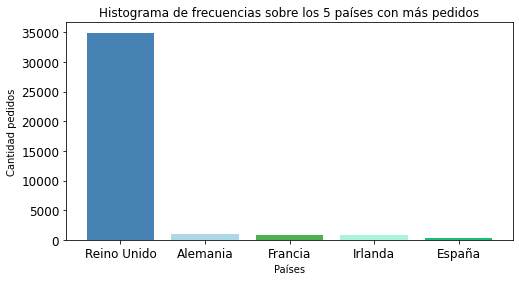

In [70]:
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias sobre los 5 países con más pedidos')

UK = pedidos[pedidos['Country'] == 'United Kingdom'].shape[0]
Ale = pedidos[pedidos['Country'] == 'Germany'].shape[0]
Francia = pedidos[pedidos['Country'] == 'France'].shape[0]
Irlanda = pedidos[pedidos['Country'] == 'EIRE'].shape[0]
Spain = pedidos[pedidos['Country'] == 'Spain'].shape[0]




plt.bar(['Reino Unido', 'Alemania', 'Francia', 'Irlanda' , 'España'], 
        [UK, Ale, Francia ,Irlanda, Spain]
       , color=['#4682B4', '#ADD8E6', '#4CAF50', '#AAF4D9', '#16C172'])

plt.xlabel('Países')
plt.ylabel('Cantidad pedidos')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()










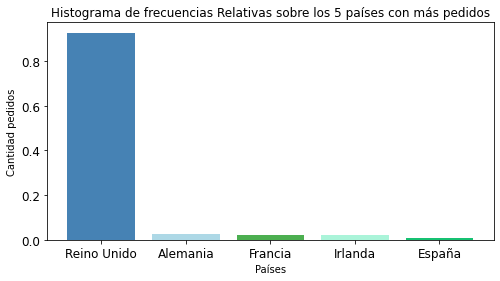

In [72]:
total = UK + Ale + Francia + Irlanda + Spain
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias Relativas sobre los 5 países con más pedidos')
plt.bar(['Reino Unido', 'Alemania', 'Francia', 'Irlanda' , 'España'], 
        [UK/total, Ale/total, Francia/total ,Irlanda/total, Spain/total]
       , color=['#4682B4', '#ADD8E6', '#4CAF50', '#AAF4D9', '#16C172'])

plt.xlabel('Países')
plt.ylabel('Cantidad pedidos')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Tiene sentido que estos sean los países con mayores compras, ya que Reino Unido es la ubicación de la tienda, por lo que los precios de envio son mucho menores que todos los demás. Por otra parte los otros cuatro paises sobrantes son países próximos al Reino Unido y los costes serán mucho menores que los demás paises.

In [84]:
cantidadArticulos_por_pais = comercio.groupby('Country')['Quantity'].sum()
print(cantidadArticulos_por_pais)

Country
Australia                 7012.0
Austria                    289.0
Bahrain                    120.0
Belgium                   2144.0
Brazil                       2.0
Canada                     171.0
Channel Islands            659.0
Cyprus                     460.0
Czech Republic              56.0
Denmark                    695.0
EIRE                     13146.0
European Community          80.0
Finland                   1062.0
France                   11394.0
Germany                  12326.0
Greece                     134.0
Iceland                    162.0
Israel                     304.0
Italy                      864.0
Japan                     1407.0
Lebanon                     47.0
Lithuania                  112.0
Malta                       51.0
Netherlands              20577.0
Norway                    1774.0
Poland                     258.0
Portugal                  1792.0
RSA                         34.0
Saudi Arabia                18.0
Singapore                  536.0
Sp

In [53]:
top_5_paises = cantidadArticulos_por_pais.nlargest(5)
print(top_5_paises)

Country
United Kingdom    461224.0
Netherlands        20577.0
EIRE               13146.0
Germany            12326.0
France             11394.0
Name: Quantity, dtype: float64


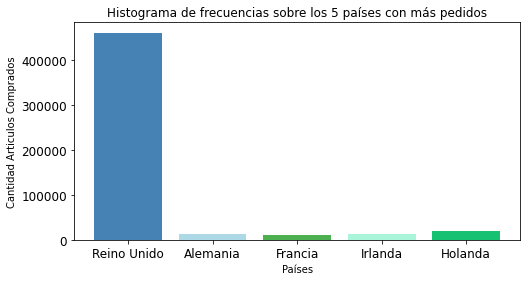

In [78]:
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias sobre los 5 países con más artículos comprados')

UK = cantidad_articulos = comercio[comercio['Country'] == 'United Kingdom']['Quantity'].sum()
Ale = cantidad_articulos = comercio[comercio['Country'] == 'Germany']['Quantity'].sum()
Francia = cantidad_articulos = comercio[comercio['Country'] == 'France']['Quantity'].sum()
Irlanda = cantidad_articulos = comercio[comercio['Country'] == 'EIRE']['Quantity'].sum()
Holanda = cantidad_articulos = comercio[comercio['Country'] == 'Netherlands']['Quantity'].sum()




plt.bar(['Reino Unido', 'Alemania', 'Francia', 'Irlanda' , 'Holanda'], 
        [UK, Ale, Francia ,Irlanda, Holanda]
       , color=['#4682B4', '#ADD8E6', '#4CAF50', '#AAF4D9', '#16C172'])

plt.xlabel('Países')
plt.ylabel('Cantidad Articulos Comprados')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()










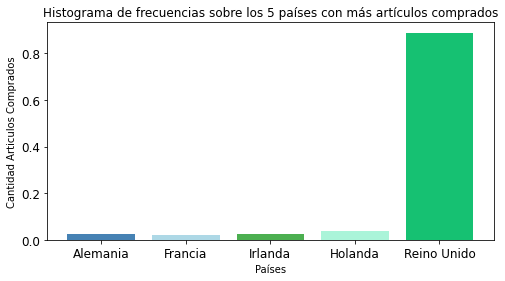

In [83]:
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias sobre los 5 países con más artículos comprados')
total = UK + Ale + Francia + Irlanda + Holanda
plt.bar(['Alemania', 'Francia', 'Irlanda' , 'Holanda', 'Reino Unido'], 
        [ Ale/total, Francia/total ,Irlanda/total, Holanda/total, UK/total,]
       , color=['#4682B4', '#ADD8E6', '#4CAF50', '#AAF4D9', '#16C172'])

plt.xlabel('Países')
plt.ylabel('Cantidad Articulos Comprados')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# Ventas por mes Año 2010-2011

In [119]:


# Convertir la columna 'InvoiceDate' al tipo de dato datetime
comercio['InvoiceDate'] = pd.to_datetime(comercio['InvoiceDate'])

# Filtrar los datos solo para el rango de fechas deseado
comercio = comercio[(comercio['InvoiceDate'] >= '2010-01-01') & (comercio['InvoiceDate'] <= '2011-12-31')]

# Crear diccionarios para almacenar las cantidades de ventas por mes
ventas_2010 = {}
ventas_2011 = {}

# Recorrer cada fila del DataFrame
for index, row in comercio.iterrows():
    # Obtener el año y mes de la fecha
    year = row['InvoiceDate'].year
    month = row['InvoiceDate'].month
    
    # Obtener la cantidad de ventas
    cantidad_ventas = row['Quantity']
    
    # Actualizar los diccionarios de acuerdo al año
    if year == 2010:
        if month not in ventas_2010:
            ventas_2010[month] = cantidad_ventas
        else:
            ventas_2010[month] += cantidad_ventas
    elif year == 2011:
        if month not in ventas_2011:
            ventas_2011[month] = cantidad_ventas
        else:
            ventas_2011[month] += cantidad_ventas




# Obtener los nombres de los meses en un diccionario
nombres_meses = {mes: calendar.month_name[mes] for mes in range(1, 13)}

# Crear nuevos diccionarios con las llaves modificadas
ventas_2010_nombres_meses = {nombres_meses[mes]: cantidad for mes, cantidad in ventas_2010.items()}
ventas_2011_nombres_meses = {nombres_meses[mes]: cantidad for mes, cantidad in ventas_2011.items()}

# Imprimir los nuevos diccionarios con las llaves modificadas
print("Ventas en el año 2010:")
print(ventas_2010_nombres_meses)
print("\nVentas en el año 2011:")
print(ventas_2011_nombres_meses)




Ventas en el año 2010:
{'December': 31526.0}

Ventas en el año 2011:
{'June': 34069.0, 'May': 31566.0, 'April': 29415.0, 'November': 63883.0, 'March': 38406.0, 'September': 48673.0, 'July': 32017.0, 'October': 55382.0, 'August': 37681.0, 'February': 21970.0, 'January': 104921.0, 'December': 17305.0}


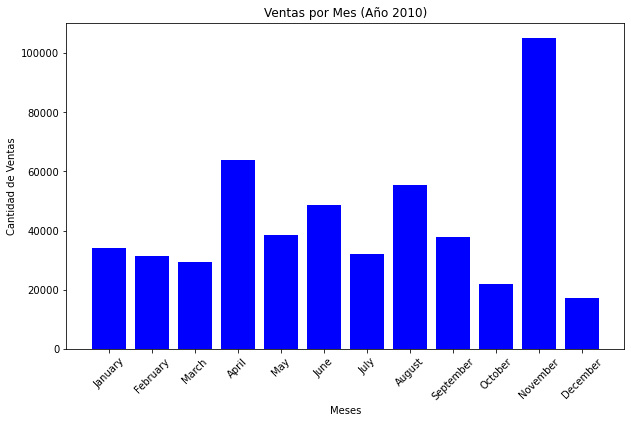

In [112]:

# Obtener las listas de meses y ventas del diccionario con nombres de meses
meses = list(ventas_2011_nombres_meses.keys())
ventas = list(ventas_2011_nombres_meses.values())

# Ordenar las llaves de los meses en el orden correcto
meses_ordenados = sorted(meses, key=lambda m: list(calendar.month_name).index(m))

# Crear el gráfico de barras con las llaves ordenadas
plt.figure(figsize=(10, 6))
plt.bar(meses_ordenados, ventas, color='blue')

# Personalizar el gráfico
plt.title('Ventas por Mes (Año 2010)')
plt.xlabel('Meses')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


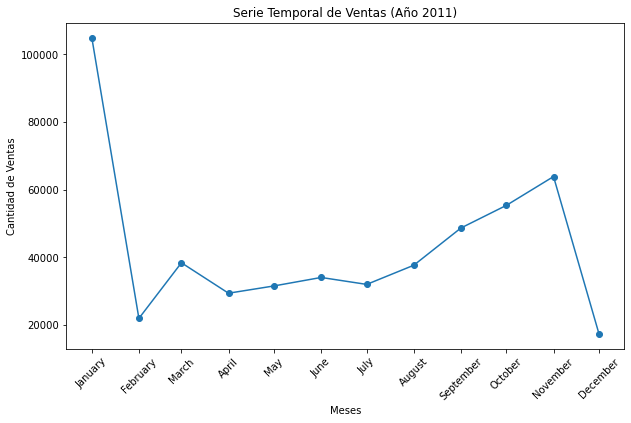

In [114]:


# Crear un DataFrame a partir del diccionario de ventas por mes


df = pd.DataFrame.from_dict(ventas_2011_nombres_meses, orient='index', columns=['Ventas'])

# Convertir el índice del DataFrame a formato de fecha
df.index = pd.to_datetime(df.index, format='%B')

# Ordenar el índice en orden cronológico
df = df.sort_index()

# Crear la serie temporal
serie_temporal = pd.Series(df['Ventas'])

# Graficar la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(serie_temporal.index, serie_temporal.values, marker='o', linestyle='-')

# Personalizar el gráfico
plt.title('Serie Temporal de Ventas (Año 2011)')
plt.xlabel('Meses')
plt.ylabel('Cantidad de Ventas')

plt.xticks(serie_temporal.index, serie_temporal.index.strftime('%B'), rotation=45)
# Mostrar el gráfico
plt.show()


Como se espera en una tienda de regalos para ocasiones importantes, su punto más alto es en diciembre, ya que es el mes de Navidad y año nuevo. 
El punto mínimo absoluto que se puede ver en la gráfica en el mes de diciembre de 2011, es porque solo llega hasta el dia 9, por se debe considerar a Febrero de 2011 como el punto mínimo absoluto de esta gráfica.

In [121]:

# Convertir la columna 'InvoiceDate' al tipo de dato datetime
comercio['InvoiceDate'] = pd.to_datetime(comercio['InvoiceDate'])

# Filtrar los datos solo para el rango de fechas deseado
comercio = comercio[(comercio['InvoiceDate'] >= '2010-01-01') & (comercio['InvoiceDate'] <= '2011-12-31')]

# Crear diccionarios para almacenar las cantidades de ventas por mes
ventas_2010 = {}
ventas_2011 = {}

# Recorrer cada fila del DataFrame
for index, row in comercio.iterrows():
    # Obtener el año y mes de la fecha
    year = row['InvoiceDate'].year
    month = row['InvoiceDate'].month
    
    # Obtener el precio unitario de la venta
    precio_unitario = row['UnitPrice']
    
    # Actualizar los diccionarios de acuerdo al año
    if year == 2010:
        if month not in ventas_2010:
            ventas_2010[month] = precio_unitario
        else:
            ventas_2010[month] += precio_unitario
    elif year == 2011:
        if month not in ventas_2011:
            ventas_2011[month] = precio_unitario
        else:
            ventas_2011[month] += precio_unitario

# Obtener los nombres de los meses en un diccionario
nombres_meses = {mes: calendar.month_name[mes] for mes in range(1, 13)}

# Crear nuevos diccionarios con las llaves modificadas
ventas_2010_nombres_meses = {nombres_meses[mes]: round(cantidad, 2) for mes, cantidad in ventas_2010.items()}
ventas_2011_nombres_meses = {nombres_meses[mes]: round(cantidad, 2) for mes, cantidad in ventas_2011.items()}

# Imprimir los nuevos diccionarios con las llaves modificadas
print("Ventas en el año 2010:")
print(ventas_2010_nombres_meses)
print("\nVentas en el año 2011:")
print(ventas_2011_nombres_meses)


Ventas en el año 2010:
{'December': 8242.46}

Ventas en el año 2011:
{'June': 8925.66, 'May': 9104.72, 'April': 9495.69, 'November': 19699.39, 'March': 9173.93, 'September': 12732.68, 'July': 7925.73, 'October': 21418.77, 'August': 7799.22, 'February': 6269.13, 'January': 6623.98, 'December': 5801.92}


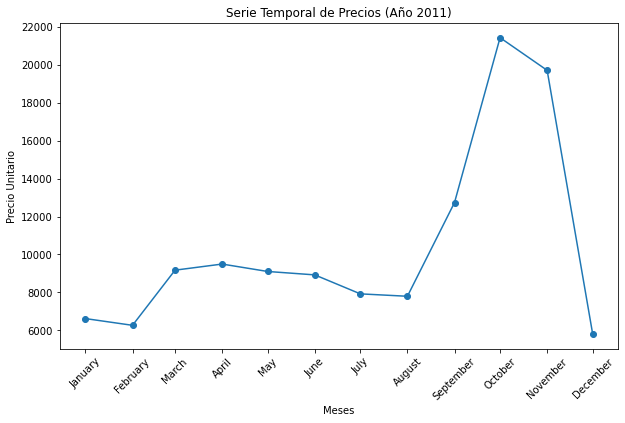

In [125]:
# Crear un DataFrame a partir del diccionario de ventas por mes
df = pd.DataFrame.from_dict(ventas_2011_nombres_meses, orient='index', columns=['Ventas'])

# Convertir el índice del DataFrame a formato de fecha
df.index = pd.to_datetime(df.index, format='%B')

# Ordenar el índice en orden cronológico
df = df.sort_index()

# Crear la serie temporal
serie_temporal = pd.Series(df['Ventas'])

# Graficar la serie temporal
plt.figure(figsize=(10, 6))
plt.plot(serie_temporal.index, serie_temporal.values, marker='o', linestyle='-')

# Personalizar el gráfico
plt.title('Serie Temporal de Precios (Año 2011)')
plt.xlabel('Meses')
plt.ylabel('Precio Unitario')

plt.xticks(serie_temporal.index, serie_temporal.index.strftime('%B'), rotation=45)

# Mostrar el gráfico
plt.show()


A pesar de ser diciembre el mes con más compras, es mediados de Septiembre y Octubre el que se lleva el premio en el mes que más dinero ha recaudado. Podemos ver que está gráfica sigue un patrón similar a la de cantidad de pedidos. Seria interesante tener data sobre más años para poder ver si se mantiene la tendencia de Septiembre el mes de más ventas ,Diciembre el mes de más pedidos y Febrero el peor mes de la empresa.